In [ ]:
!pip install pycaret
!pip install pycaret[full] --user
!pip install pycaret-ts-alpha --user
!pip install kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scipy-1.5.4-cp37-cp37m-manylinux1_x86_64.whl (25.9 MB)
     |████████████████████████████████| 3.3 MB 8.5 MB/s 
  Using cached scikit_learn-0.23.2-cp37-cp37m-manylinux1_x86_64.whl (6.8 MB)
  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)
     |████████████████████████████████| 26.3 MB 84.9 MB/s 
     |████████████████████████████████| 15.3 MB 19.1 MB/s 
  Using cached MarkupSafe-2.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
     |████████████████████████████████| 306 kB 64.4 MB/s 
  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)
  Using cached numpy-1.19.5-cp37-cp37m-manylinux2010_x86_64.whl (14.8 MB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
  Attempting uninstall: numpy
    Found existing insta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numba-0.55.2-cp37-cp37m-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.3 MB)
  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Using cached yellowbrick-1.4-py3-none-any.whl (274 kB)
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
  Using cached scipy-1.7.3-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (38.1 MB)
  Using cached scikit_learn-1.0.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (24.8 MB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Using cached imbalanced_learn-0.9.0-py3-none-any.whl (199 kB)
  Using cached llvmlite-0.38.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.5 MB)
  Consider adding this directory to PATH or, if you prefer to suppress this 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import jinja2


In [ ]:
import datetime
import numpy as np
import pandas as pd
import warnings
import pycaret
import kaleido
import plotly.express as px

from pycaret.time_series import *
from pycaret.utils import enable_colab

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
enable_colab()

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


Colab mode enabled.


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/totldays.csv")

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/cleanedData.csv")
df.reset_index()
df.head()

,Unnamed: 0,date,T
0,0,2020-02-27,1.0
1,1,2020-02-28,14.0
2,2,2020-02-29,4.0
3,3,2020-03-01,0.0
4,4,2020-03-02,1.0


In [ ]:
df["date"]=pd.to_datetime(df["date"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  800 non-null    int64         
 1   date        800 non-null    datetime64[ns]
 2   T           800 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 18.9 KB


In [ ]:
df.set_index('date', inplace=True, drop=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 800 entries, 2020-02-27 to 2022-05-06
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  800 non-null    int64  
 1   T           800 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 18.8 KB


In [ ]:
df.drop(columns="Unnamed: 0",inplace=True)

In [ ]:

df=df.asfreq('D')

In [ ]:
from pycaret.time_series import *

In [ ]:
s = setup(df,fh = 80, fold = 3, session_id = 123)


,Description,Value
0,session_id,123
1,Target,T
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(800, 1)"
5,Train data shape,"(720, 1)"
6,Test data shape,"(80, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


In [ ]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Actual,Length,,800.0
1,Summary,Statistics,Actual,Mean,,121.40625
2,Summary,Statistics,Actual,Median,,138.0
3,Summary,Statistics,Actual,Standard Deviation,,68.955219
4,Summary,Statistics,Actual,Variance,,4754.822239
5,Summary,Statistics,Actual,Kurtosis,,-0.870998
6,Summary,Statistics,Actual,Skewness,,-0.292342
7,Summary,Statistics,Actual,# Distinct Values,,223.0
8,White Noise,Ljung-Box,Actual,Test Statictic,"{'alpha': 0.05, 'K': 24}",2602.040627
9,White Noise,Ljung-Box,Actual,Test Statictic,"{'alpha': 0.05, 'K': 48}",3975.766819


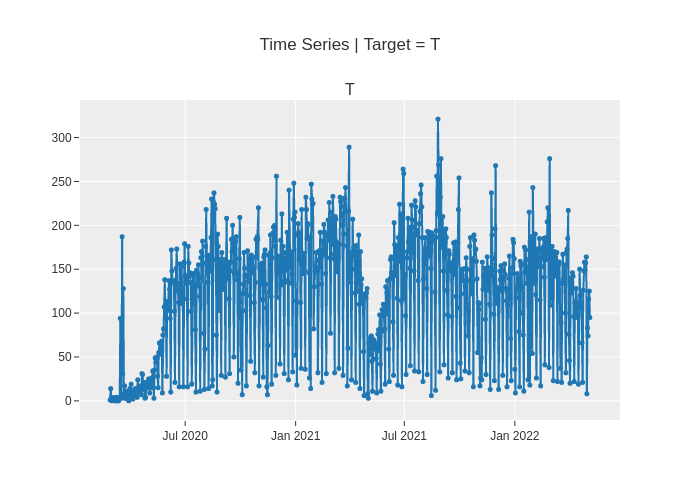

In [ ]:
plot_model(plot = 'ts', fig_kwargs = {'hoverinfo': 'none', 'big_data_threshold': 15})

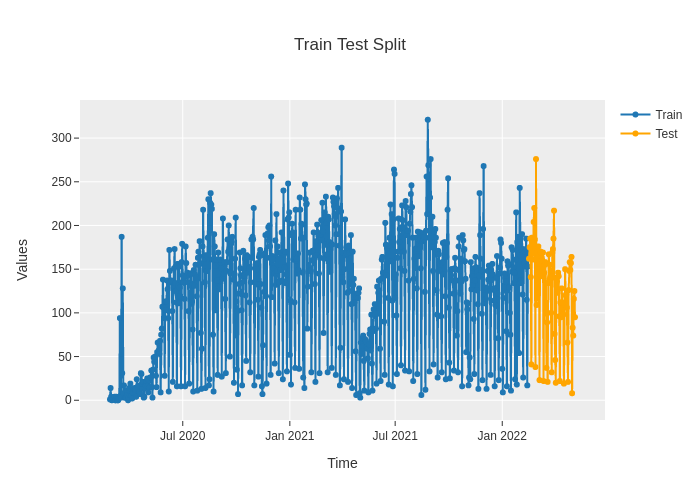

In [ ]:
plot_model(plot = 'train_test_split', fig_kwargs = {'hoverinfo': 'none', 'big_data_threshold': 15})

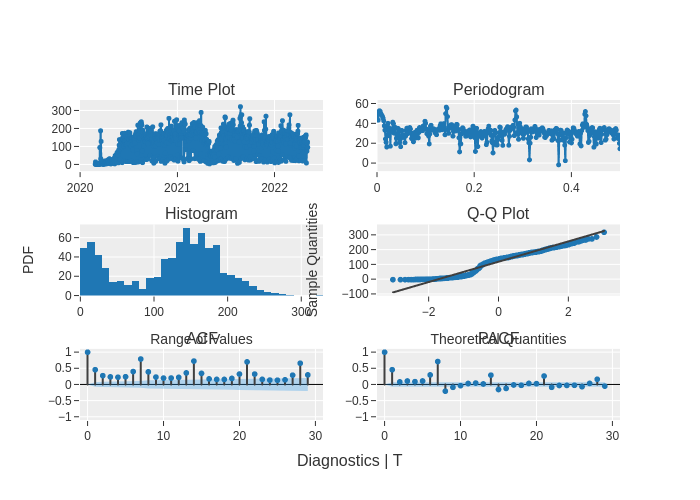

In [ ]:
plot_model(plot = 'diagnostics', fig_kwargs = {'hoverinfo': 'none', 'big_data_threshold': 15})

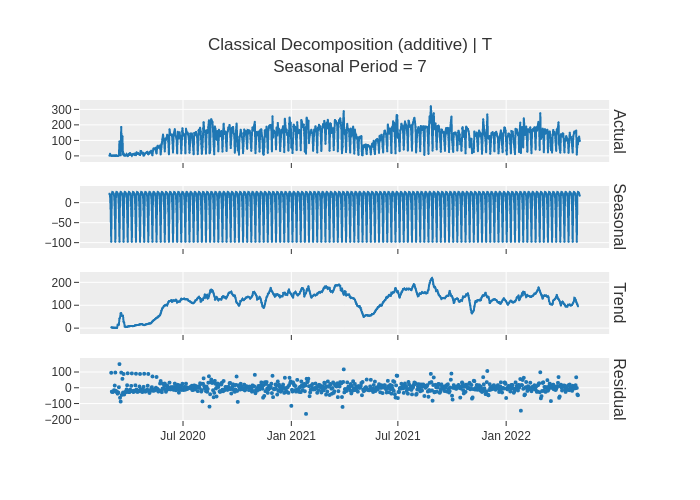

ValueError: ignored

In [ ]:
plot_model(plot = 'decomp', fig_kwargs = {'hoverinfo': 'none','big_data_threshold': 15})
plot_model(plot = 'decomp', data_kwargs={'type': 'multiplicative'}, 
           fig_kwargs = {'hoverinfo': 'none','big_data_threshold': 15})
plot_model(plot = 'decomp_stl', fig_kwargs = {'hoverinfo': 'none','big_data_threshold': 15})

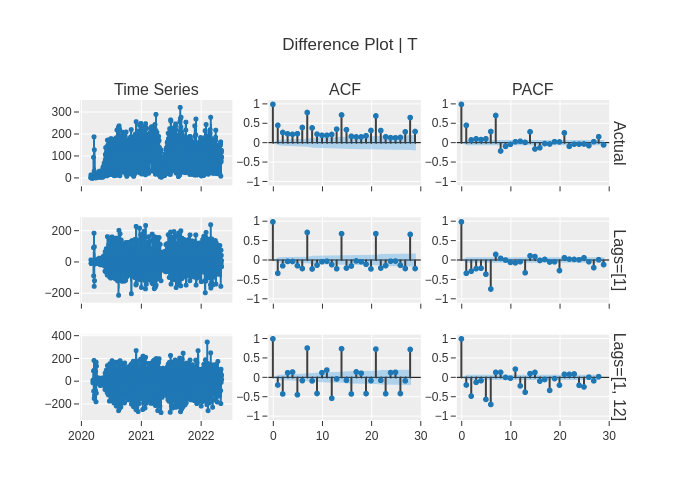

In [ ]:
plot_model(plot = 'diff', data_kwargs={'lags_list': [[1], [1, 12]], 'acf': True, 'pacf': True}, 
           fig_kwargs = {'hoverinfo': 'none','big_data_threshold':15})

In [ ]:
models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend.PolynomialTrendForeca...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
croston,Croston,sktime.forecasting.croston.Croston,True
ets,ETS,sktime.forecasting.ets.AutoETS,True


In [ ]:
best = compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
snaive,Seasonal Naive Forecaster,36.2583,48.5518,0.4167,0.2904,1.2305,1.136,0.3085,0.0333
auto_arima,Auto ARIMA,33.0143,42.8777,0.5678,0.2908,1.1228,1.0047,0.4582,122.8400
arima,ARIMA,39.2938,51.4556,0.4904,0.2968,1.3315,1.203,0.1655,0.4267
ets,ETS,40.4523,50.4837,0.5817,0.3249,1.374,1.1827,0.1879,0.2900
exp_smooth,Exponential Smoothing,40.8564,50.8343,0.6006,0.3301,1.388,1.1909,0.1823,0.9300
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,39.4686,48.6492,0.6662,0.3428,1.3388,1.1386,0.2775,0.2767
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize...,43.1056,51.7342,0.7516,0.3669,1.4603,1.2099,0.1537,0.2233
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,43.1056,51.7342,0.7516,0.3669,1.4603,1.2099,0.1537,0.2500
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,43.1056,51.7342,0.7516,0.3669,1.4603,1.2099,0.1537,0.2233
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,43.1161,51.7424,0.7518,0.3669,1.4606,1.2101,0.1534,0.2500


In [ ]:
exps_tune = tune_model(best)
print(best)
print(exps_tune)


,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2021-06-20,56.8163,67.5633,0.3526,0.3967,1.9841,1.6070,-0.0022
1,2021-09-08,24.3095,35.4433,0.3389,0.2249,0.8246,0.8319,0.5928
2,2021-11-27,23.1306,34.0914,0.3134,0.2197,0.7649,0.7829,0.6429
Mean,NaT,34.7521,45.6994,0.3349,0.2804,1.1912,1.0739,0.4112
SD,NaT,15.6092,15.4700,0.0162,0.0822,0.5612,0.3775,0.2930


NaiveForecaster(sp=7)
NaiveForecaster(sp=7, strategy='mean')


,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,Seasonal Naive Forecaster,27.1533,37.3963,0.2779,0.2358,0.8961,0.8635,0.5367


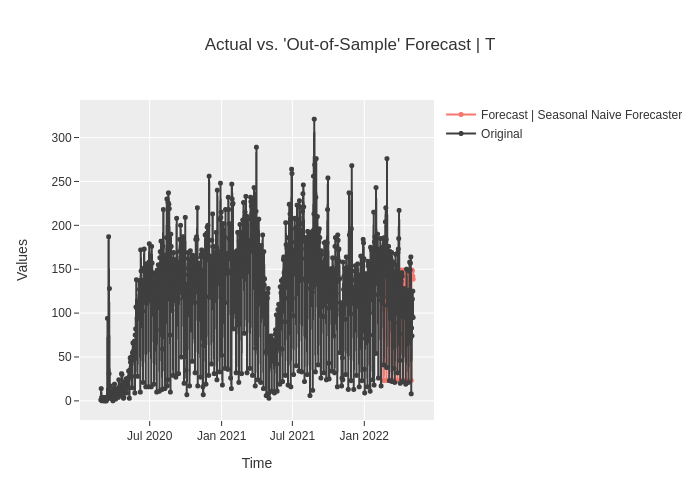

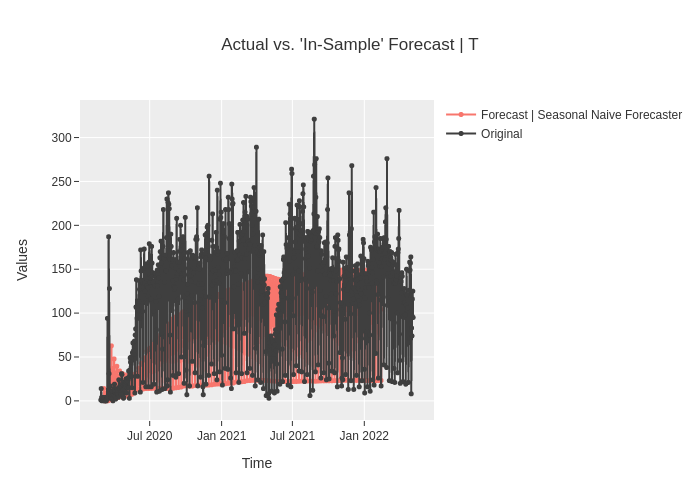

In [ ]:
predict_es = predict_model(exps_tune)
plot_model(estimator = exps_tune, fig_kwargs = {'hoverinfo': 'none','big_data_threshold': 15})
plot_model(exps_tune, plot = 'insample', fig_kwargs = {'hoverinfo': 'none','big_data_threshold': 15})